Part 1

In [2]:
 import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

Problem Statments

Dataset link: https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download

This data describes the relation between the mental health of a student, to their GPA. By comparing acedemic status to features like if the student in question has anxeity, or panic attacks. 

Our main question is realizing if student's mental health has a real effect on their acedemic preformance. We will use the factor of depression in particular.

On the way, we can investigate these three sub-questions.

1. Out of each group, which year of students is depression issues more likely to effect?
2. Are male or female students effected more by depression?
3. Are depression, anxiety, or panic attacks most common in general?

Part 2

Data Cleaning

We don't need every single column here, as not every factor plays a role in our hypothesis. For example, the timestamp, marriage, and career columns of data has nothing to do with any of our questions and sub-questions. 



In [29]:
df = pd.read_csv('Student Mental Health.csv')
df.drop(columns=['Timestamp', 'What is your course?', 'Marital status'], inplace=True)
print(df)

    Choose your gender   Age Your current year of Study What is your CGPA?  \
0               Female  18.0                     year 1        3.00 - 3.49   
1                 Male  21.0                     year 2        3.00 - 3.49   
2                 Male  19.0                     Year 1        3.00 - 3.49   
3               Female  22.0                     year 3        3.00 - 3.49   
4                 Male  23.0                     year 4        3.00 - 3.49   
..                 ...   ...                        ...                ...   
96              Female  21.0                     year 1        3.50 - 4.00   
97                Male  18.0                     Year 2        3.00 - 3.49   
98              Female  19.0                     Year 3        3.50 - 4.00   
99              Female  23.0                     year 4        3.50 - 4.00   
100               Male  20.0                     Year 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Pa

Data Cleaning 

Next we will check for any missing values, we can do this by using the dropna()feature to seek out null values. 

In [30]:
df.dropna(inplace=True)
print(df)

    Choose your gender   Age Your current year of Study What is your CGPA?  \
0               Female  18.0                     year 1        3.00 - 3.49   
1                 Male  21.0                     year 2        3.00 - 3.49   
2                 Male  19.0                     Year 1        3.00 - 3.49   
3               Female  22.0                     year 3        3.00 - 3.49   
4                 Male  23.0                     year 4        3.00 - 3.49   
..                 ...   ...                        ...                ...   
96              Female  21.0                     year 1        3.50 - 4.00   
97                Male  18.0                     Year 2        3.00 - 3.49   
98              Female  19.0                     Year 3        3.50 - 4.00   
99              Female  23.0                     year 4        3.50 - 4.00   
100               Male  20.0                     Year 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Pa

Now we're going to check for duplicates. If there is any duplicate data within the table, it will be discarded. 


In [31]:
duplicates = df[df.duplicated()]

# Display the potential duplicate rows
print("Potential Duplicate Rows:")
print(duplicates)

Potential Duplicate Rows:
   Choose your gender   Age Your current year of Study What is your CGPA?  \
38             Female  18.0                     year 1        3.50 - 4.00   
45               Male  18.0                     year 1        3.50 - 4.00   
58             Female  18.0                     year 1        3.50 - 4.00   
61             Female  19.0                     year 1        3.50 - 4.00   
64             Female  24.0                     year 1        3.50 - 4.00   
70             Female  24.0                     year 1        3.00 - 3.49   
79             Female  18.0                     year 4        3.50 - 4.00   
93             Female  18.0                     year 1        3.00 - 3.49   
95             Female  18.0                     year 1        3.50 - 4.00   
97               Male  18.0                     Year 2        3.00 - 3.49   

   Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
38                      No                   No  

In [32]:
df.drop_duplicates(inplace=True)
print(df)

    Choose your gender   Age Your current year of Study What is your CGPA?  \
0               Female  18.0                     year 1        3.00 - 3.49   
1                 Male  21.0                     year 2        3.00 - 3.49   
2                 Male  19.0                     Year 1        3.00 - 3.49   
3               Female  22.0                     year 3        3.00 - 3.49   
4                 Male  23.0                     year 4        3.00 - 3.49   
..                 ...   ...                        ...                ...   
94              Female  24.0                     Year 3           0 - 1.99   
96              Female  21.0                     year 1        3.50 - 4.00   
98              Female  19.0                     Year 3        3.50 - 4.00   
99              Female  23.0                     year 4        3.50 - 4.00   
100               Male  20.0                     Year 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Pa

Data Cleaning

Our code is looking loads more clean now, getting rid of unnecessary detail makes analyzing the final data a lot easier. Next we're going to want to list the datatypes out to see if they're all correct.

In [33]:
print(df.dtypes)

Choose your gender                               object
Age                                             float64
Your current year of Study                       object
What is your CGPA?                               object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object


Because age cannot be a decimal number, we're going to convert it to a more ideal type, an int.

In [34]:
df['Age'] = df['Age'].astype(int)
print(df.dtypes)

Choose your gender                              object
Age                                              int32
Your current year of Study                      object
What is your CGPA?                              object
Do you have Depression?                         object
Do you have Anxiety?                            object
Do you have Panic attack?                       object
Did you seek any specialist for a treatment?    object
dtype: object


Everything else should be fine, as object classes are commonly used to story text data.

Data Cleaning

Our last step in cleaning, is to remove any inconsistencies. This may be anything from spelling mistakes in the catagory variables, to outliers in the numerical variables. After looking throughout the document, I haven't been able to spot any grammer mistakes within the inputs, and each integer stays between the boundries of 18 - 24. So there are no outliers. None the less, we will run a check for them anyways. Making sure the ints stay between 18  and 24, and setting all text to be capitalized so that everything is completely consistant.

In [35]:
#Checking that each category is consistant 
categorical_columns = ['Choose your gender', 'Your current year of Study', 'What is your CGPA?',
                       'Marital status', 'Do you have Depression?', 'Do you have Anxiety?',
                       'Do you have Panic attack?', 'Did you seek any specialist for treatment?']
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.upper()  
        
#Checking for rows with age outliers
age_outliers = (df['Age'] < 18) | (df['Age'] > 24)
df = df[~age_outliers] 
print(df)

    Choose your gender  Age Your current year of Study What is your CGPA?  \
0               FEMALE   18                     YEAR 1        3.00 - 3.49   
1                 MALE   21                     YEAR 2        3.00 - 3.49   
2                 MALE   19                     YEAR 1        3.00 - 3.49   
3               FEMALE   22                     YEAR 3        3.00 - 3.49   
4                 MALE   23                     YEAR 4        3.00 - 3.49   
..                 ...  ...                        ...                ...   
94              FEMALE   24                     YEAR 3           0 - 1.99   
96              FEMALE   21                     YEAR 1        3.50 - 4.00   
98              FEMALE   19                     YEAR 3        3.50 - 4.00   
99              FEMALE   23                     YEAR 4        3.50 - 4.00   
100               MALE   20                     YEAR 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack? 

Exploratory Data Analysis 
Now it's time to analyze our findings. Our main question was "does student's mental health have a direct effect on their academic performance?". We'll be answering this with our sub questions using the data we've cleaned. So it's time to take a look at each sub question entirely.

A. Process the data

In [36]:
pivot_table_year = df.pivot_table(index='Your current year of Study', 
                                  values=['Do you have Depression?'], 
                                  aggfunc='count')
print(pivot_table_year)

pivot_table_gender = df.pivot_table(index='Choose your gender', 
                                    values=['Do you have Depression?'], 
                                    aggfunc='count')
print(pivot_table_gender)

pivot_table_conditions = df.pivot_table(index=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'What is your CGPA?'])
print(pivot_table_conditions)


                            Do you have Depression?
Your current year of Study                         
YEAR 1                                           34
YEAR 2                                           25
YEAR 3                                           24
YEAR 4                                            7
                    Do you have Depression?
Choose your gender                         
FEMALE                                   67
MALE                                     23
                                                                                                 Age
Do you have Depression? Do you have Anxiety? Do you have Panic attack? What is your CGPA?           
NO                      NO                   NO                        0 - 1.99            18.500000
                                                                       2.00 - 2.49         18.000000
                                                                       2.50 - 2.99         19.000000
       

C:\Users\kadel\AppData\Local\Temp\ipykernel_5804\3643088545.py:11: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table_conditions = df.pivot_table(index=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'What is your CGPA?'])


B. Graph the result

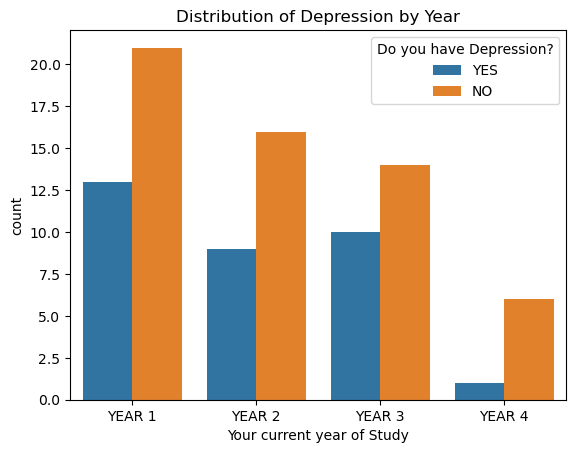

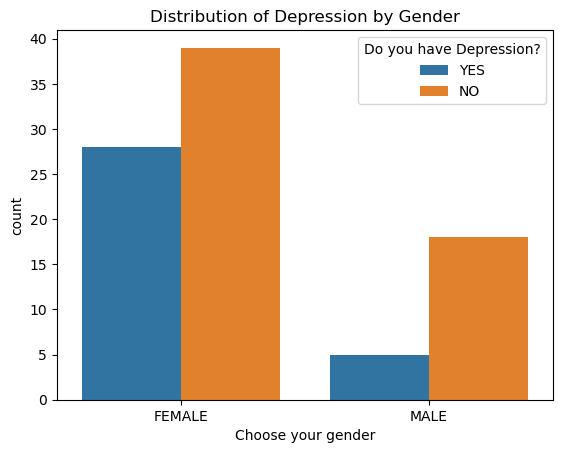

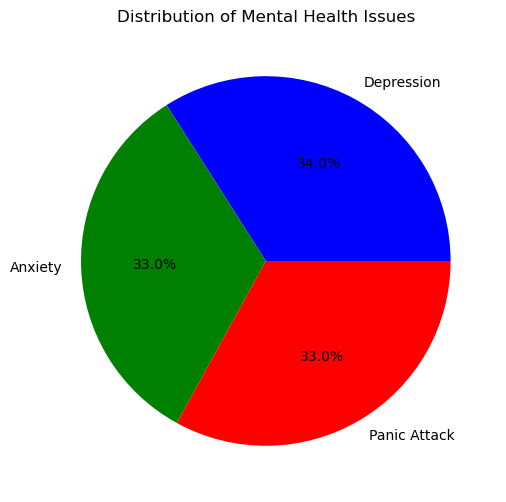

In [45]:
#Number of students with depression per year
sns.countplot(data=df, x='Your current year of Study', hue='Do you have Depression?')
plt.title('Distribution of Depression by Year')
plt.show()

#Number of students with depression based on gender
sns.countplot(data=df, x='Choose your gender', hue='Do you have Depression?')
plt.title('Distribution of Depression by Gender')
plt.show()


#Which issue among the crowd is most common, compared against each other
depression_count = df['Do you have Depression?'].value_counts()
anxiety_count = df['Do you have Anxiety?'].value_counts()
panic_attack_count = df['Do you have Panic attack?'].value_counts()

#Creating data for the pie chart
labels = ['Depression', 'Anxiety', 'Panic Attack']
sizes = [depression_count['YES'], anxiety_count['YES'], panic_attack_count['YES']]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Mental Health Issues')

plt.show()

C. Interprete the result

1. This bar chart illustrates the distribution of the mental health issue, depression, across different years of study among the surveyed students. It provides a visual representation of how these issues are more likely to affect students in various academic years. For instance, it shows whether students in their first year of study are more or less likely to experience these mental health concerns compared to those in subsequent years. The trend of this chart shows us that as the years go by, depression in those surveyed, lessens. It only decreases slightly during the second and third year, but tanks exponentially in the final. This could very well be seen as schoolwork, projects, and due dates adding extra pressure among students. The preassure to keep your GPA up, that sticks with you until the very end. The decrease in depression could have something to do with an increase of accomplishment and pride as one moves along the ranks.


2. This bar chart showcases the distribution of the mental health issue, depression, among male and female students. Using it, we can figure out whether there are gender-based differences in the owning of the mental illness, depression. By comparing the counts for each condition between male and female students, we can clearly see that female students seem to deal with the effects of depression much more commonly than male students. This can be contributed to the fact that statistically, it has been proven, women are more emotionally expressive. It's not like all women are confirmed more emotional than men, but they are said to share their feelings more often than men. The trend of this graph also shows that more females were interviewed in general. This may skew the data, so when evaluating, we have to be careful.


3. This pie chart contains an interesting visual summary of the distribution of the given three mental health conditions: depression, anxiety, and panic attacks. It presents the percentage breakdown of each condition, which should allow us to easily identify which condition is most prevalent among the surveyed students. However, the graph shows that these illnesses are somewhat evenly spread, surprisingly. This however can be explained. Not only can one participant suffer from multiple effects, but some of them come hand and hand with each other. Often, depression and anxiety can both lead to panic attacks under pressure. And if one has either, the other illness may be acquired, or diagnosed. While it's interesting that there is no one greater power, it makes a lot of sense at the same time. 

Summary

With this dataset, there are lots of points we can infer. Within my question and sub-questions, I most commonly brought up depression over anxiety or panic attacks. The reason for this being, the dataset for each illness is somewhat evenly spread, and we can essentially utilize only one of the illnesses to compute the big picture. As well as depression being slightly more common than the other two factors. My main question for this research was "if student's mental health has a real effect on their academic performance". I'm quite convinced that it does, as I believe the first sub question answers a lot of our hypothesizes. The findings suggest that depression tends to decrease as students progress through their academic years, possibly due to the added pressure of schoolwork and GPA maintenance. Additionally, we can also infer that female students are more vocal, and possibly more effected by these factors. However, due to the data asking more female students in total, this data might not be accurate. In the future, a better set of data should ask each side equally, to get a better understanding of each perspective. We also went over the fact that each illness, while not identical in nature, is seen equally throughout those they are distributed to. We have seen how the crowd is effected by these illnesses, but have mostly failed to make a solid foundation in comparing those effected with their general scores and grades. If we wanted to find out truly 'what' is effected, and not just 'how' those interviewed are effected. There is definetely more room for deeper exploration into this topic. As it's no doubt much more could be uncovered with plenty of other comparisons to draw from. You could even utilize points we dropped early on, such as marrital status, and what course is studied, to see if there are even more factors that play into the academic behvaior of students. In conclusion, this analysis provides a glimpse into the complex relationship between mental health and academic performance in students. It isn't perfect, but I have also found what else to research, to delve further into this topic. It goes deeper, as there are thousends of different factors that could play into one's behavior. But overall, mental issues like depression are some of the most impactful. 